### import libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### creating dataset

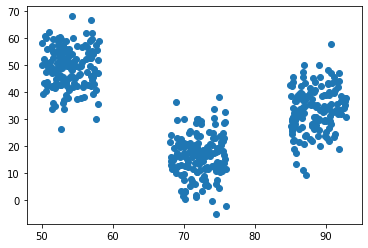

In [31]:
cluster_center1 = (50, 50)
cluster_center2 = (85, 35)
cluster_center3 = (68, 15)
points_distance = 8


cx1 = np.random.uniform(cluster_center1[0], cluster_center1[0] + points_distance, size=(150,))
cy1 = np.random.normal(cluster_center1[1], points_distance, size=(150,)) 

cx2 = np.random.uniform(cluster_center2[0], cluster_center2[0] + points_distance, size=(150,))
cy2 = np.random.normal(cluster_center2[1], points_distance, size=(150,)) 

cx3 = np.random.uniform(cluster_center3[0], cluster_center3[0] + points_distance, size=(150,))
cy3 = np.random.normal(cluster_center3[1], points_distance, size=(150,))

subset1=pd.DataFrame({'X': cx1, 'Y': cy1})
subset2=pd.DataFrame({'X': cx2, 'Y': cy2})
subset3=pd.DataFrame({'X': cx3, 'Y': cy3})
df = pd.concat([subset1,subset2,subset3])
plt.scatter(df['X'], df['Y'])
plt.show()

## k-means algorithm

In [32]:
def KNN(df, number_of_clusters):
    data_cp1 = df.copy()
    clusters_1 = np.zeros(len(data_cp1))
    current_centroids = data_cp1.sample(n=number_of_clusters)  # taking random 3 centroids
    current_centroids.reset_index(drop=True, inplace=True)  # resetting selected centroid indices
    # Initializing old centroids as the size of centroids and the initial value is 0
    previous_centroids = pd.DataFrame(np.zeros(shape=(number_of_clusters, data_cp1.shape[1])),
                                      columns=data_cp1.columns)

    # it will iterate untill the previous_centroids is equal to the current_centroids

    while not previous_centroids.equals(current_centroids):

        previous_centroids = current_centroids.copy(deep=True)

        # calculating distance for every datapoint
        ##          expectation part      ##


        for point_index in range(0, len(data_cp1)):
            distance_from_current_point = list()
            point = data_cp1.iloc[point_index]

            # calculating distance of the current point from the centroids and assign the shortest distance in clusters_1
            for centroid_index in range(0, len(current_centroids)):
                centroid = current_centroids.iloc[centroid_index]

                distance_from_current_point.append(np.linalg.norm(point - centroid))

            clusters_1[point_index] = np.argmin(distance_from_current_point)

        # Computing the new centroid (mean) of each cluster.
        ##              maximization  part                ##
        for indx in range(0, number_of_clusters):

            cluster_indx = np.where(clusters_1 == indx)[0]

            if len(cluster_indx) > 0:
                current_centroids.loc[indx] = data_cp1.iloc[cluster_indx].mean()

            else:
                current_centroids.loc[indx] = previous_centroids.loc[indx]


    return clusters_1, current_centroids

In [33]:
num_cluster=3
df['pred_label'],centroid_coordinate=KNN(df,num_cluster)

In [34]:
df

,X,Y,pred_label
0,53.024108,45.682353,1.0
1,53.848667,54.358469,1.0
2,56.373888,47.493198,1.0
3,51.816541,41.503964,1.0
4,51.609293,54.745453,1.0
...,...,...,...
145,75.256185,20.533175,0.0
146,75.964560,11.290507,0.0
147,74.403437,12.833102,0.0
148,75.679218,28.436639,2.0


In [35]:
centroid_coordinate

,X,Y
0,72.396086,15.240027
1,53.843995,49.445165
2,87.922589,34.060982


### printing estimating location

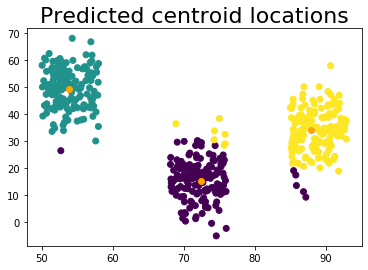

In [40]:
plt.title('Predicted centroid locations', fontsize=22) 
plt.scatter(df['X'], df['Y'],c=df['pred_label'])

plt.scatter(centroid_coordinate['X'], centroid_coordinate['Y'],c='orange')
plt.show()